In [14]:
# from torch.utils.data import Dataset 
# from PIL import Image
# import numpy as np
# import os 
# import torchvision.transforms as transforms

# from datasets import concatenate_datasets, load_dataset


In [15]:
# !pip install -q git+https://github.com/huggingface/transformers.git

In [17]:
# # !pip install -q datasets
# # from torch.utils.data import Dataset 
# from PIL import Image
# import numpy as np
# import os 
# import torchvision.transforms as transforms
# from datasets import load_dataset

In [2]:
import torch

In [6]:
from torch.utils.data import Dataset 
from datasets import load_dataset
from PIL import Image
import numpy as np
import os 

In [7]:
dataset = load_dataset("chloechia/correctloveda")
train_image = load_dataset("chloechia/correctloveda", split="train")
validation_image = load_dataset("chloechia/correctloveda", split="validation")

Found cached dataset imagefolder (/home/chia/.cache/huggingface/datasets/chloechia___imagefolder/chloechia--correctloveda-701d9bc57e72e64b/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)
100%|██████████| 2/2 [00:00<00:00, 61.23it/s]
Found cached dataset imagefolder (/home/chia/.cache/huggingface/datasets/chloechia___imagefolder/chloechia--correctloveda-701d9bc57e72e64b/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)
Found cached dataset imagefolder (/home/chia/.cache/huggingface/datasets/chloechia___imagefolder/chloechia--correctloveda-701d9bc57e72e64b/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)


In [8]:
mask_dataset = load_dataset("chloechia/maskloveda")

Found cached dataset imagefolder (/home/chia/.cache/huggingface/datasets/chloechia___imagefolder/chloechia--maskloveda-30d1338528c17a6a/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)
100%|██████████| 2/2 [00:00<00:00, 81.42it/s]


In [9]:
train_image = train_image.remove_columns("label")
validation_image = validation_image.remove_columns("label")
train_mask_dataset = load_dataset("chloechia/maskloveda", split="train")
train_mask_dataset = train_mask_dataset.remove_columns("label")
val_mask_dataset = load_dataset("chloechia/maskloveda", split="validation")
# val_mask_dataset = val_mask_dataset.remove_columns("label")

Found cached dataset imagefolder (/home/chia/.cache/huggingface/datasets/chloechia___imagefolder/chloechia--maskloveda-30d1338528c17a6a/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)
Found cached dataset imagefolder (/home/chia/.cache/huggingface/datasets/chloechia___imagefolder/chloechia--maskloveda-30d1338528c17a6a/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)


In [10]:
val_mask_dataset = load_dataset("chloechia/maskloveda", split="validation")
val_mask_dataset = val_mask_dataset.remove_columns("label")
val_mask_dataset = val_mask_dataset.rename_column("image", "mask")

Found cached dataset imagefolder (/home/chia/.cache/huggingface/datasets/chloechia___imagefolder/chloechia--maskloveda-30d1338528c17a6a/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)


In [11]:
train_mask_dataset = train_mask_dataset.rename_column("image", "mask")

In [12]:
from datasets import concatenate_datasets, load_dataset

In [13]:
official_train = concatenate_datasets([train_image, train_mask_dataset], axis=1)
official_val = concatenate_datasets([validation_image, val_mask_dataset], axis=1)
official_train, official_val

(Dataset({
     features: ['image', 'mask'],
     num_rows: 1366
 }),
 Dataset({
     features: ['image', 'mask'],
     num_rows: 1669
 }))

# Done with making train and val sets

In [25]:
official_train[1]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024>,
 'mask': <PIL.PngImagePlugin.PngImageFile image mode=L size=1024x1024>}

In [26]:
import cv2

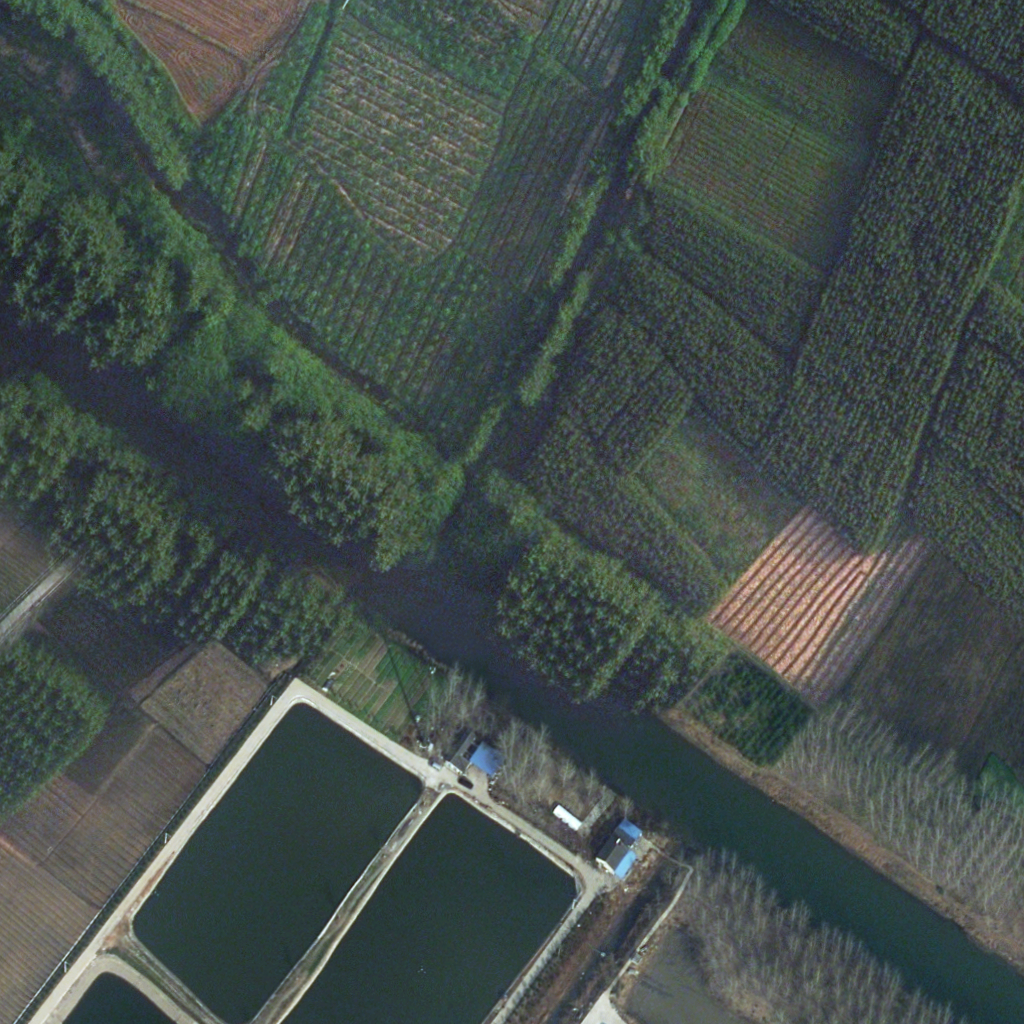

In [29]:
image = official_train[1]['image']
image

In [15]:
import numpy as np 

mask = official_train[1]['mask']
segmentation_map = np.array(mask)
segmentation_map

array([[4, 4, 4, ..., 7, 7, 7],
       [4, 4, 4, ..., 7, 7, 7],
       [4, 4, 4, ..., 7, 7, 7],
       ...,
       [7, 7, 7, ..., 4, 4, 4],
       [7, 7, 7, ..., 4, 4, 4],
       [7, 7, 7, ..., 4, 4, 4]], dtype=uint8)

In [16]:
np.unique(segmentation_map)

array([1, 2, 3, 4, 6, 7], dtype=uint8)

In [17]:
from huggingface_hub import hf_hub_download
import json

repo_id = f"chloechia/loveda"
filename = "id2label.json"
id2label = json.load(open(hf_hub_download(repo_id, filename, repo_type="dataset"), "r"))
id2label = {int(k):v for k,v in id2label.items()}
print(id2label)

{0: 'Ignore', 1: 'Background', 2: 'Building', 3: 'Road', 4: 'Water', 5: 'Barren', 6: 'Forest', 7: 'Agricultural'}


In [18]:
labels = [id2label[label] for label in np.unique(segmentation_map)]
print(labels)

['Background', 'Building', 'Road', 'Water', 'Forest', 'Agricultural']


In [19]:
def color_palette():
    """Color palette that maps each class to RGB values.
    
    This one is actually taken from ADE20k.
    """
    return [[255, 255, 255], [255,0,0], [255,255,0], [0,0,255], [159,129,183], [0,255,0], [255,195, 128]]

palette = color_palette()
palette

[[255, 255, 255],
 [255, 0, 0],
 [255, 255, 0],
 [0, 0, 255],
 [159, 129, 183],
 [0, 255, 0],
 [255, 195, 128]]

In [20]:
import numpy as np
from torch.utils.data import Dataset

class ImageSegmentationDataset(Dataset):
    """Image segmentation dataset."""

    def __init__(self, dataset, transform):
        """
        Args:
            dataset
        """
        self.dataset = dataset
        self.transform = transform
        
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, idx):
        original_image = np.array(self.dataset[idx]['image'])
        original_segmentation_map = np.array(self.dataset[idx]['mask'])
        
        transformed = self.transform(image=original_image, mask=original_segmentation_map)
        image, segmentation_map = transformed['image'], transformed['mask']

        # convert to C, H, W
        image = image.transpose(2,0,1)

        return image, segmentation_map, original_image, original_segmentation_map

In [ ]:
from torch.utils.data import Dataset 
import torchvision.transforms as transforms

import albumentations as A

# ADE_MEAN = np.array([123.675, 116.28, 103.53]) / 255
# ADE_STD = np.array([58.395, 57.12, 57.375]) / 255

train_transform = A.Compose([
    A.LongestMaxSize(max_size=1333),
    A.RandomCrop(width=512, height=512),
    A.HorizontalFlip(p=0.5),
    A.Normalize(mean=(123.675, 116.28, 103.53), std=(58.395, 57.12, 57.375)),
])

test_transform = A.Compose([
    A.Resize(width=512, height=512),
    A.Normalize(mean=(123.675, 116.28, 103.53), std=(58.395, 57.12, 57.375)),

])

# train_transforms = transforms.Compose([
#     transforms.RandomCrop((512, 512)),
#     transforms.RandomHorizontalFlip(p=0.5),
#     transforms.RandomVerticalFlip(p=0.5),
#     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[123.675, 116.28, 103.53],
#                           std=[58.395, 57.12, 57.375])
# ])

# test_transform = transforms.Compose([
#     transforms.Resize((512, 512)), 
#     transforms.Normalize(mean=[123.675, 116.28, 103.53],
#                           std=[58.395, 57.12, 57.375])
# ])

train_dataset = ImageSegmentationDataset(official_train, transform=train_transform)
test_dataset = ImageSegmentationDataset(official_val, transform=test_transform)

In [31]:
image, segmentation_map, _, _ = train_dataset[0]
print(image.shape)
print(segmentation_map.shape)

(3, 512, 512)
(512, 512)


In [32]:
labels = [id2label[label] for label in np.unique(segmentation_map)]
print(labels)

['Background', 'Agricultural']


# Finetuning

In [43]:
from torch.utils.data import DataLoader


# function where we use the preprocessor of MaskFormer to turn the images and maps into the format that MaskFormer expects 
# per-pixel annotations of the segmentation map will be turned into a set of binary masks and corresponding labels 
def collate_fn(batch):
    inputs = list(zip(*batch))
    images = inputs[0]
    segmentation_maps = inputs[1]
    # this function pads the inputs to the same size,
    # and creates a pixel mask
    # actually padding isn't required here since we are cropping
    batch = preprocessor(
        images,
        segmentation_maps=segmentation_maps,
        return_tensors="pt",
    )

    batch["original_images"] = inputs[2]
    batch["original_segmentation_maps"] = inputs[3]
    
    return batch

train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, collate_fn=collate_fn)
test_dataloader = DataLoader(test_dataset, batch_size=2, shuffle=False, collate_fn=collate_fn)
     

In [42]:
from transformers import Mask2FormerForUniversalSegmentation, AutoImageProcessor
preprocessor = AutoImageProcessor.from_pretrained("facebook/mask2former-swin-small-cityscapes-semantic")
model = Mask2FormerForUniversalSegmentation.from_pretrained("facebook/mask2former-swin-small-cityscapes-semantic", id2label=id2label, ignore_mismatched_sizes=True)


Some weights of Mask2FormerForUniversalSegmentation were not initialized from the model checkpoint at facebook/mask2former-swin-small-cityscapes-semantic and are newly initialized because the shapes did not match:
- class_predictor.weight: found shape torch.Size([20, 256]) in the checkpoint and torch.Size([9, 256]) in the model instantiated
- class_predictor.bias: found shape torch.Size([20]) in the checkpoint and torch.Size([9]) in the model instantiated
- criterion.empty_weight: found shape torch.Size([20]) in the checkpoint and torch.Size([9]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [44]:
outputs = model(batch["pixel_values"],
                class_labels=batch["class_labels"],
                mask_labels=batch["mask_labels"])

NameError: name 'batch' is not defined

In [46]:
outputs.loss

NameError: name 'outputs' is not defined

In [ ]:
!pip install -q evaluate


In [47]:
import evaluate

metric = evaluate.load("mean_iou")

In [48]:
import torch
from tqdm.auto import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)

running_loss = 0.0
num_samples = 0
for epoch in range(20):
  print("Epoch:", epoch)
  model.train()
  for idx, batch in enumerate(tqdm(train_dataloader)):
      # Reset the parameter gradients
      optimizer.zero_grad()

      # Forward pass
      outputs = model(
          pixel_values=batch["pixel_values"].to(device),
          mask_labels=[labels.to(device) for labels in batch["mask_labels"]],
          class_labels=[labels.to(device) for labels in batch["class_labels"]],
      )

      # Backward propagation
      loss = outputs.loss
      loss.backward()

      batch_size = batch["pixel_values"].size(0)
      running_loss += loss.item()
      num_samples += batch_size

      if idx % 100 == 0:
        print("Loss:", running_loss/num_samples)

      # Optimization
      optimizer.step()

  model.eval()
  for idx, batch in enumerate(tqdm(test_dataloader)):
    if idx > 5:
      break

    pixel_values = batch["pixel_values"]
    
    # Forward pass
    with torch.no_grad():
      outputs = model(pixel_values=pixel_values.to(device))

    # get original images
    original_images = batch["original_images"]
    target_sizes = [(image.shape[0], image.shape[1]) for image in original_images]
    # predict segmentation maps
    predicted_segmentation_maps = preprocessor.post_process_semantic_segmentation(outputs,
                                                                                  target_sizes=target_sizes)

    # get ground truth segmentation maps
    ground_truth_segmentation_maps = batch["original_segmentation_maps"]

    metric.add_batch(references=ground_truth_segmentation_maps, predictions=predicted_segmentation_maps)
  
  # NOTE this metric outputs a dict that also includes the mIoU per category as keys
  # so if you're interested, feel free to print them as well
  print("Mean IoU:", metric.compute(num_labels = len(id2label), ignore_index = 0)['mean_iou'])

Epoch: 0


  0%|          | 0/683 [00:01<?, ?it/s]


ValueError: The image to be converted to a PIL image contains values outside the range [0, 1], got [-1.7925336360931396, 2.5702831745147705] which cannot be converted to uint8.

In [ ]:
batch = next(iter(test_dataloader))
for k,v in batch.items():
  if isinstance(v, torch.Tensor):
    print(k,v.shape)
  else:
    print(k,len(v))


pixel_values torch.Size([2, 3, 384, 384])
pixel_mask torch.Size([2, 384, 384])
mask_labels 2
class_labels 2
original_images 2
original_segmentation_maps 2


In [ ]:
with torch.no_grad():
  outputs = model(batch["pixel_values"].to(device))

In [ ]:
original_images = batch["original_images"]
target_sizes = [(image.shape[0], image.shape[1]) for image in original_images]
# predict segmentation maps
predicted_segmentation_maps = preprocessor.post_process_semantic_segmentation(outputs, target_sizes=target_sizes)
     

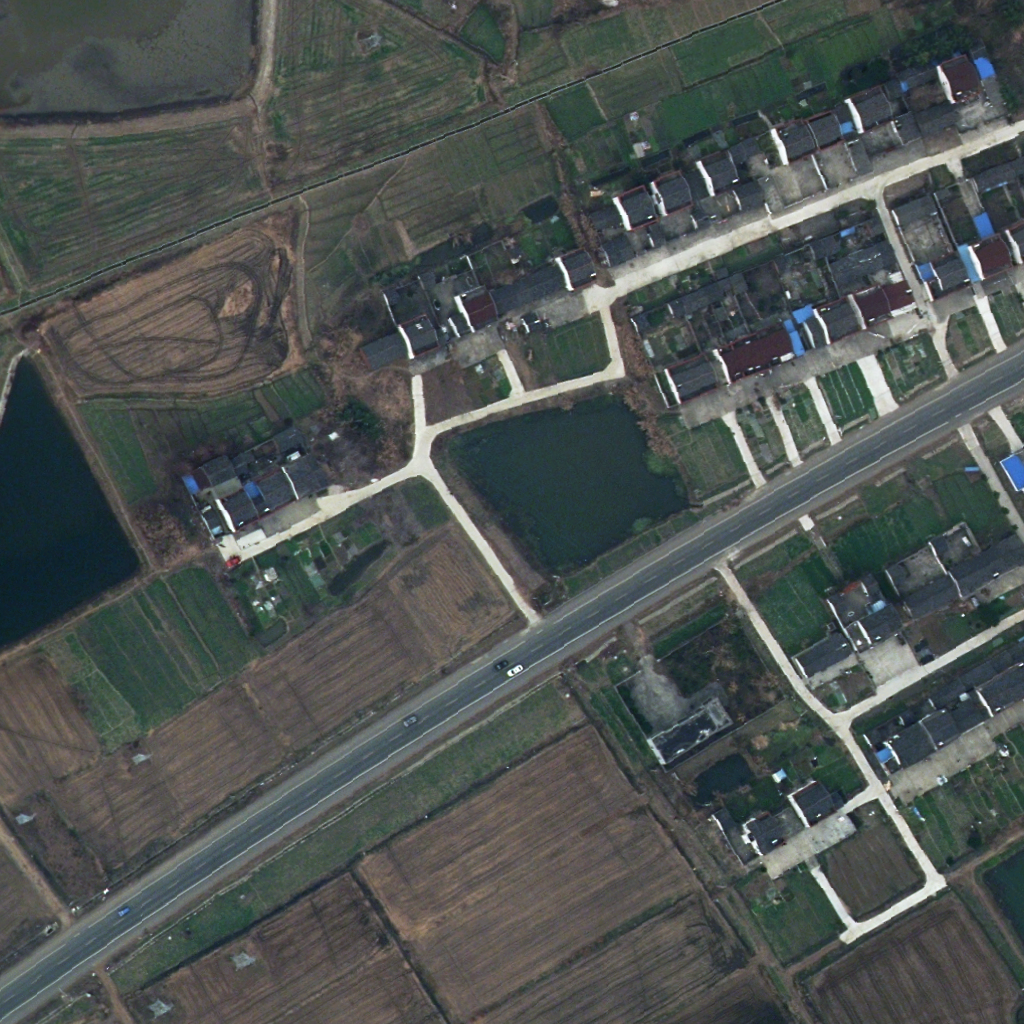

In [ ]:

image = batch["original_images"][0]
Image.fromarray(image)

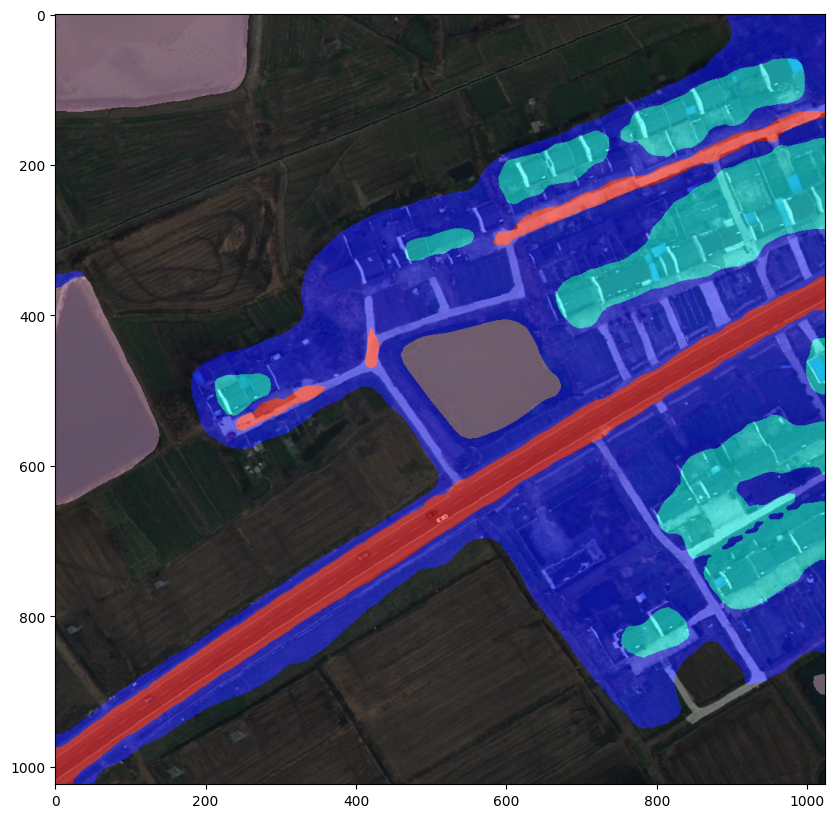

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

segmentation_map = predicted_segmentation_maps[0].cpu().numpy()

color_segmentation_map = np.zeros((segmentation_map.shape[0], segmentation_map.shape[1], 3), dtype=np.uint8) # height, width, 3
for label, color in enumerate(palette):
    color_segmentation_map[segmentation_map == label, :] = color
# Convert to BGR
ground_truth_color_seg = color_segmentation_map[..., ::-1]

img = image * 0.5 + ground_truth_color_seg * 0.5
img = img.astype(np.uint8)

plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.show()

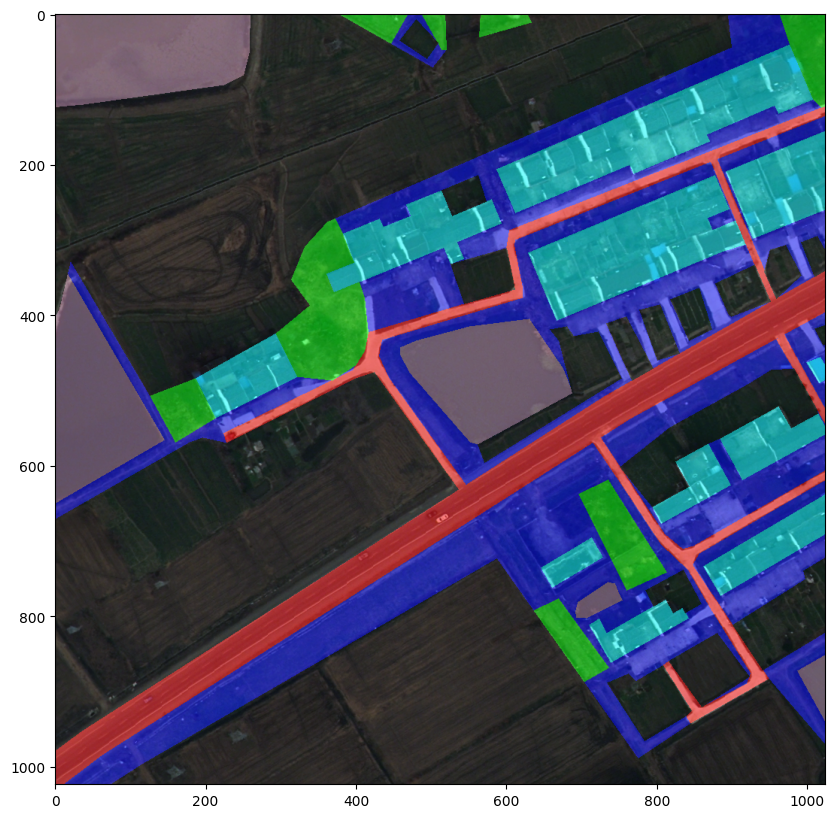

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

segmentation_map = batch["original_segmentation_maps"][0]

color_segmentation_map = np.zeros((segmentation_map.shape[0], segmentation_map.shape[1], 3), dtype=np.uint8) # height, width, 3
for label, color in enumerate(palette):
    color_segmentation_map[segmentation_map == label, :] = color
# Convert to BGR
ground_truth_color_seg = color_segmentation_map[..., ::-1]

img = image * 0.5 + ground_truth_color_seg * 0.5
img = img.astype(np.uint8)

plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.show()

In [ ]:
np.unique(segmentation_map)

NameError: name 'np' is not defined

In [ ]:
outputs = model(batch["pixel_values"],
                class_labels=batch["class_labels"],
                mask_labels=batch["mask_labels"])

In [ ]:
outputs.loss


In [ ]:
!pip install -q evaluate


In [ ]:
import evaluate

metric = evaluate.load("mean_iou")